# Trabalho 2
## Lógica Computacional 2020-2021

> O objetivo deste trabalho é a modelação de grafos,  em Z3 e  NetworkX.

> Trabalho realizado por: 
    > 1. Paulo Costa - A87986
    > 2. André Araújo - A87987

### Exercício 1
1. Um sistema de tráfego  é representado por um grafo orientado ligado. Os nodos denotam pontos de acesso e  os arcos denotam vias de comunicação só com um sentido . 
    >  O grafo tem de ser ligado o que significa que entre cada par de nodos $\langle n_1,n_2 \rangle$ tem de existir um caminho $n_1 \leadsto n_2$ e um caminho $n_2\leadsto n_1$.
    
    a. Gerar aleatoriamente o grafo. Assuma $N=32$ para o número de nodos. 
    
        i. Cada nodo tem um número aleatório de descendentes no intervalo 1..d cujos destinos são também gerados aleatoriamente. Assume-se que não existem “loops” nem repetição de destinos.
    
    b. Pretende-se fazer  manutenção interrompendo  determinadas vias.
    
    Determinar $\underline{o\  maior\  número\  de\  vias}$ que é possível remover mantendo o grafo ligado.

## Resolução:

>Para gerar o grafo orientado com $N=32$ nodos e tendo cada nodo um número aleatório de descendentes no intervalo 1..d,
usamos randint para gerar um número de descendentes de cada nodo $V$. \
\
Em seguida, criámos um ciclo de forma a percorrer e a retirar, com choice, um descendente de uma lista com todos os nodos do grafo exceto o nodo $V$ e os descendentes já escolhidos. \
\
Finalmente, para garantir $i. $ , verificamos se o grafo era fortemente gerado, através da utilização da função "nx.is_strongly_connected(G)", para que entre cada par de nodos $\langle n_1,n_2 \rangle$ exista um caminho $n_1 \leadsto n_2$ e um caminho $n_2\leadsto n_1$. 

In [1]:
import networkx as nx

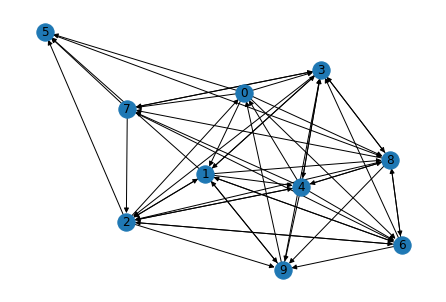

In [4]:
from z3 import *
from random import choice,randint
def geragrafo(n,d):
    G=nx.DiGraph()
    G.add_nodes_from([i for i in range(n)])
    while(not nx.is_strongly_connected(G)):
        G=nx.DiGraph()
        G.add_nodes_from([i for i in range(n)])
        for i in  range(n):
            seq=[j for j in range(n) if j!=i]
            t=randint(1,d)
            for _ in range(0,t):
                m=choice(seq)
                seq=[j for j in seq if j!=m]
                edge = (i, m)
                G.add_edge(*edge)
    return G 
            
G=geragrafo(10,7)      
nx.draw(G, with_labels=True)

## Resolução:

>Entre quaisquer dois pontos de acesso $<v_1,v_2>$, tem de existir sempre um caminho $v_1 \leadsto v_2$.\
Delineamos então a seguinte fórmula proposicional: \
\
$$
\forall_{o} \in E \cdot \forall_{d\neq o}\in E \cdot \bigvee_{p\in {o\leadsto d}}(\sum_{i=0}^{len(p)-1} x_{p[i],p[i+1]} = len(p)-1)
$$ \
\
Já para determinar $\underline{o\  maior\  número\  de\  vias}$ que é possível remover mantendo o grafo ligado, maximizamos o número de vias que podemos retirar, utilizando a função mazimize na seguinte condição: \
\
$$
\sum_{e\in E} 1 - \sum_{e\in E} x_e
$$

In [5]:
def fechamaximovias(G):
    s=Optimize()
    x={}
    V=list(G.nodes)
    for e in list(G.edges): 
        x[e]=Int('x_'+str(e))
        s.add(x[e]>=0,x[e]<=1)
    for o in V:
        for d in V:
            if d!=o:
                s.add(Or([sum([x[p[i],p[i+1]] for i in range(len(p)-1)])==len(p)-1 for p in list(nx.all_simple_paths(G,o,d))]))            
    print(G.number_of_edges())
    s.maximize(G.number_of_edges()-sum([x[e] for e in list(G.edges)]))
    if s.check() == sat:
        m=s.model()
        graph=nx.DiGraph()
        graph.add_edges_from([e for e in list(G.edges) if m[x[e]]==1])
        nx.draw(graph, with_labels=True)
        return m.eval(G.number_of_edges()-sum([x[e] for e in list(G.edges)]))
            
fechamaximovias(G)            
    

KeyboardInterrupt: 

## Conclusão:

>Achamos que o exercício 1 deste trabalho, acabou por ser concluído com grande sucesso. \
\
Tivemos como maior dificuldade, talvez a parte das condições, que nos permitiraiam retirar o maior número de vias possível do grafo, mantendo-o ligado. \
\
Depois de termos conseguido colocar as nossas ideias, em formato de fórmulas proposicionais, achamos que tudo ficou mais fácil e posteriormente, o resultado foi bastante positivo. \
\
Foi mais uma vez, um exercício muito interessante de fazer e que, felizmente, foi resolvido com sucesso!